In [1]:
# Lets visualize and check seasonality trend of our time series.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library

import warnings
warnings.filterwarnings('ignore')

In [2]:
# we are loading dataset : weather conditions in world war 2
# Summary_of_Weather.csv
# It includes measured min, max and mean temperatures from weather stations.

# This is very large dataset. You may get "Low memory" warning
weather_df = pd.read_csv("Summary_of_Weather.csv", low_memory=False)
weather_df.shape

(119040, 31)

In [3]:
weather_df.head(1)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# data cleaning : get only those columns from weather_df, which we intend to use. 
# what we will use only
weather = weather_df.loc[ : , ["STA","Date","MeanTemp"] ]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Date      119040 non-null  object 
 2   MeanTemp  119040 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 78252 to 79002
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STA       751 non-null    int64  
 1   Date      751 non-null    object 
 2   MeanTemp  751 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 23.5+ KB
None
---------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 78252 to 79002
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   STA       751 non-null    int64         
 1   Date      751 non-null    datetime64[ns]
 2   MeanTemp  751 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 23.5 KB
None


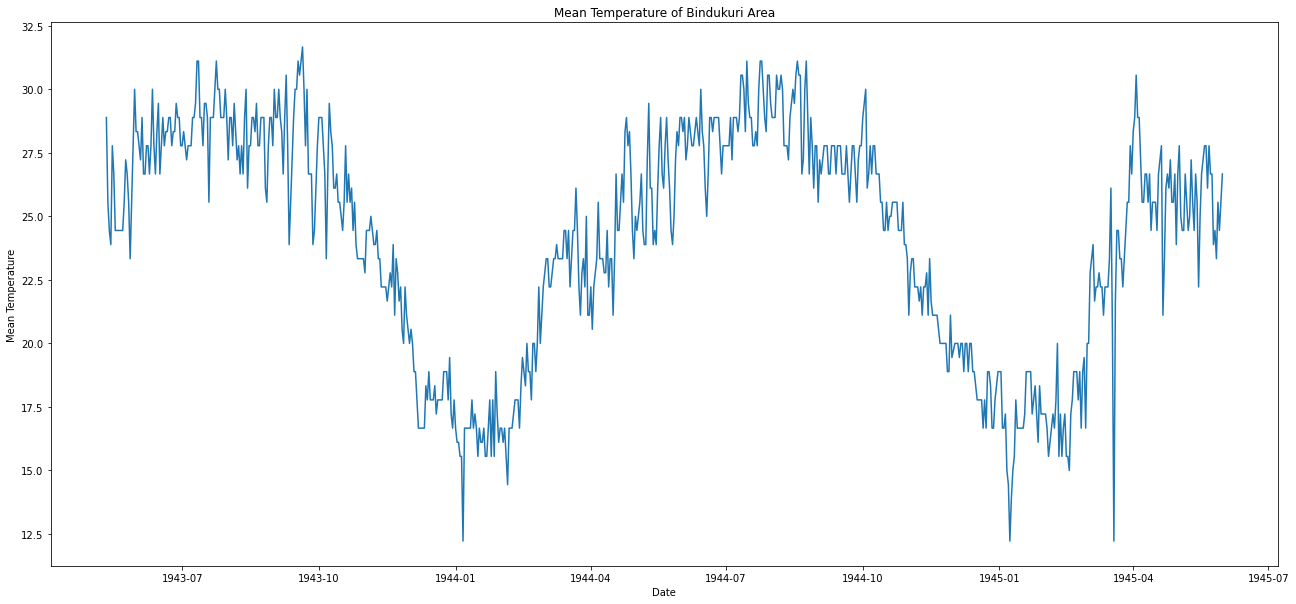

In [5]:
weather_bin = weather.loc[weather.STA == 32907]
print(weather_bin.info())
print("---------------------------------------------------")
weather_bin["Date"] = pd.to_datetime(weather_bin["Date"])
print(weather_bin.info())

plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date, weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show();

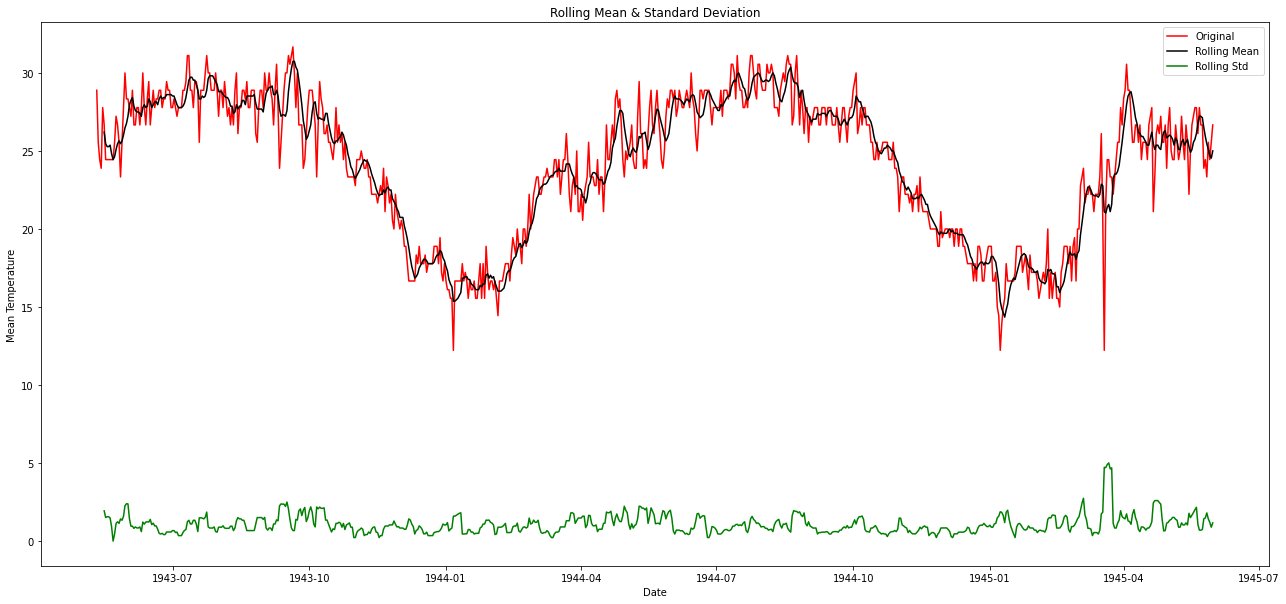

Test statistic:  -1.4095966745887758
p-value:  0.5776668028526356
Critical Values: {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


In [6]:
# adfuller library  -> Augmented Dicky Fuller Test
from statsmodels.tsa.stattools import adfuller

# check_adfuller, replace the old name with cal_adfuller
def cal_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts) # Augmented Dicky Fuller Test
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    # result[2] -> usedlag , the number of lags used
    # result[3] -> nobs, The number of observations used for the regression and calculation of the critical values.
    print('Critical Values:' ,result[4]) ## is a dict
    
# check_mean_std  , replace the old name with plotting_rolling_stats
def plotting_rolling_stats(ts):
    #Rolling statistics
    rolmean = ts.rolling(6).mean()  # 6 is the window size
    rolstd = ts.rolling(6).std()
    
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
    
# lets create time series from weather 
timeSeries = weather_bin.loc[ : , ["Date","MeanTemp"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date",axis=1)


# check stationary: mean, variance(std) and adfuller test
plotting_rolling_stats(ts)  
## plotting the rolling mean and rolling std of the ts

cal_adfuller(ts.MeanTemp)    ## doing ADF test

In [7]:
# we are working with a AirPassengers.csv Toy-data-Set.
# for experimenting in this topic : "Making Time series Stationary"

#loading important libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#reading the dataset
train = pd.read_csv('AirPassengers.csv')
train.info()
print("-----------------------")

#preprocessing
train.timestamp = pd.to_datetime(train.Month)
train.index = train.timestamp
train.drop('Month',axis = 1, inplace = True)

#looking at the first few rows
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
-----------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


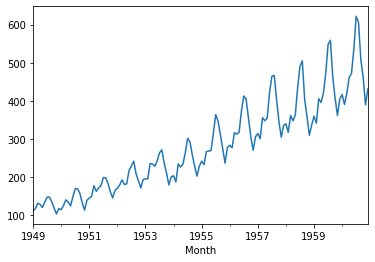

In [8]:
# plotting the toy-data-set
train['#Passengers'].plot();

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
Name: #Passengers, dtype: int64
Month
1949-01-01      NaN
1949-02-01    112.0
1949-03-01    118.0
Name: #Passengers, dtype: float64
Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
Name: #Passengers_diff, dtype: float64


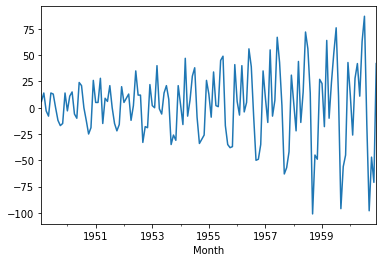

In [9]:
train['#Passengers_diff'] = train['#Passengers'] - train['#Passengers'].shift(1)

print(train['#Passengers'].head(3))
print(train['#Passengers'].shift(1).head(3))
print(train['#Passengers_diff'].head(3))

train['#Passengers_diff'].dropna().plot();

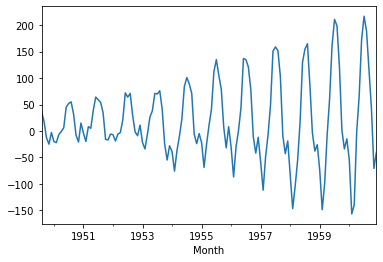

In [10]:
n = 7
train['#Passengers_diff'] = train['#Passengers'] - train['#Passengers'].shift(n)
train['#Passengers_diff'].dropna().plot();

## n(points) = n - s  = 144 - 7 = 137
## Nan's created = shift size = s = 7

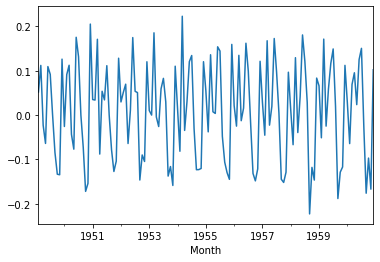

In [12]:
train['#Passengers_log'] = np.log(train['#Passengers'])

train['#Passengers_log_diff'] = train['#Passengers_log'] - train['#Passengers_log'].shift(1)

train['#Passengers_log_diff'].dropna().plot();